In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.metrics import classification_report

In [ ]:
DataDipakai = pd.read_csv("/content/DataTweetFilm15.csv")
DataDipakai

,created_at,id_str,full_text,lang,username,tweet_url,image_url,location
0,Fri Dec 01 08:28:45 +0000 2023,1730504195101589879,Gadis Kretek. https://t.co/Q91SneDSht,ht,CenayangFilm,https://twitter.com/CenayangFilm/status/173050...,https://pbs.twimg.com/media/GAP8ZOFbEAAanG3.jpg,mbahcenayang@gmail.com
1,Thu Dec 07 18:21:57 +0000 2023,1732827804897845557,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,in,annswlym,https://twitter.com/annswlym/status/1732827804...,https://pbs.twimg.com/ext_tw_video_thumb/17328...,in a fairy tail🌷
2,Fri Dec 08 08:37:52 +0000 2023,1733043201697841419,Gadis Kretek gambarnya bagus https://t.co/IKJ...,in,taniatakoyaki,https://twitter.com/taniatakoyaki/status/17330...,https://pbs.twimg.com/media/GA0BmamaEAAr2Xc.jpg,NaN
3,Tue Dec 05 02:55:00 +0000 2023,1731869752862351630,"mvs Buat yang mw nonton gadis kretek"" versi su...",in,moviemenfes,https://twitter.com/moviemenfes/status/1731869...,https://pbs.twimg.com/media/GAjV2Y8awAAaFnJ.jpg,MORE INFO CHECK LIKES
4,Tue Dec 05 17:13:58 +0000 2023,1732085918063001736,:(( nemu di tiktok malah makin kepikiran gadis...,in,cyeonhae,https://twitter.com/cyeonhae/status/1732085918...,https://pbs.twimg.com/media/GAma9VMaAAELhAe.jpg,NaN
...,...,...,...,...,...,...,...,...
195,Thu Dec 07 02:16:16 +0000 2023,1732584779835650082,Tbtb ada runtuh di gadis kretek? 😭,in,imkwtawa,https://twitter.com/imkwtawa/status/1732584779...,NaN,NaN
196,Thu Dec 07 22:57:36 +0000 2023,1732897173002743956,Selamat pagi kak joe ini aku buatin kopi sus...,in,AkunKokGitu15,https://twitter.com/AkunKokGitu15/status/17328...,https://pbs.twimg.com/media/GAx8y68agAA6lWK.jpg,NaN
197,Thu Dec 07 12:18:19 +0000 2023,1732736294407819714,Sakit hati bgt nonton gadis kretek,in,justdeforshort,https://twitter.com/justdeforshort/status/1732...,NaN,NaN
198,Tue Dec 05 10:00:31 +0000 2023,1731976839126777897,Ada Juga yang seru Nih ; 1. https://t.co/l7V...,in,USAnelies,https://twitter.com/USAnelies/status/173197683...,NaN,Everywhere


In [ ]:
Data = pd.read_csv("/content/DataTweetFilm15.csv")
Data

,created_at,id_str,full_text,lang,username,tweet_url,image_url,location
0,Fri Dec 01 08:28:45 +0000 2023,1730504195101589879,Gadis Kretek. https://t.co/Q91SneDSht,ht,CenayangFilm,https://twitter.com/CenayangFilm/status/173050...,https://pbs.twimg.com/media/GAP8ZOFbEAAanG3.jpg,mbahcenayang@gmail.com
1,Thu Dec 07 18:21:57 +0000 2023,1732827804897845557,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,in,annswlym,https://twitter.com/annswlym/status/1732827804...,https://pbs.twimg.com/ext_tw_video_thumb/17328...,in a fairy tail🌷
2,Fri Dec 08 08:37:52 +0000 2023,1733043201697841419,Gadis Kretek gambarnya bagus https://t.co/IKJ...,in,taniatakoyaki,https://twitter.com/taniatakoyaki/status/17330...,https://pbs.twimg.com/media/GA0BmamaEAAr2Xc.jpg,NaN
3,Tue Dec 05 02:55:00 +0000 2023,1731869752862351630,"mvs Buat yang mw nonton gadis kretek"" versi su...",in,moviemenfes,https://twitter.com/moviemenfes/status/1731869...,https://pbs.twimg.com/media/GAjV2Y8awAAaFnJ.jpg,MORE INFO CHECK LIKES
4,Tue Dec 05 17:13:58 +0000 2023,1732085918063001736,:(( nemu di tiktok malah makin kepikiran gadis...,in,cyeonhae,https://twitter.com/cyeonhae/status/1732085918...,https://pbs.twimg.com/media/GAma9VMaAAELhAe.jpg,NaN
...,...,...,...,...,...,...,...,...
195,Thu Dec 07 02:16:16 +0000 2023,1732584779835650082,Tbtb ada runtuh di gadis kretek? 😭,in,imkwtawa,https://twitter.com/imkwtawa/status/1732584779...,NaN,NaN
196,Thu Dec 07 22:57:36 +0000 2023,1732897173002743956,Selamat pagi kak joe ini aku buatin kopi sus...,in,AkunKokGitu15,https://twitter.com/AkunKokGitu15/status/17328...,https://pbs.twimg.com/media/GAx8y68agAA6lWK.jpg,NaN
197,Thu Dec 07 12:18:19 +0000 2023,1732736294407819714,Sakit hati bgt nonton gadis kretek,in,justdeforshort,https://twitter.com/justdeforshort/status/1732...,NaN,NaN
198,Tue Dec 05 10:00:31 +0000 2023,1731976839126777897,Ada Juga yang seru Nih ; 1. https://t.co/l7V...,in,USAnelies,https://twitter.com/USAnelies/status/173197683...,NaN,Everywhere


In [ ]:
Data.drop_duplicates()

,created_at,id_str,full_text,lang,username,tweet_url,image_url,location
0,Fri Dec 01 08:28:45 +0000 2023,1730504195101589879,Gadis Kretek. https://t.co/Q91SneDSht,ht,CenayangFilm,https://twitter.com/CenayangFilm/status/173050...,https://pbs.twimg.com/media/GAP8ZOFbEAAanG3.jpg,mbahcenayang@gmail.com
1,Thu Dec 07 18:21:57 +0000 2023,1732827804897845557,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,in,annswlym,https://twitter.com/annswlym/status/1732827804...,https://pbs.twimg.com/ext_tw_video_thumb/17328...,in a fairy tail🌷
2,Fri Dec 08 08:37:52 +0000 2023,1733043201697841419,Gadis Kretek gambarnya bagus https://t.co/IKJ...,in,taniatakoyaki,https://twitter.com/taniatakoyaki/status/17330...,https://pbs.twimg.com/media/GA0BmamaEAAr2Xc.jpg,NaN
3,Tue Dec 05 02:55:00 +0000 2023,1731869752862351630,"mvs Buat yang mw nonton gadis kretek"" versi su...",in,moviemenfes,https://twitter.com/moviemenfes/status/1731869...,https://pbs.twimg.com/media/GAjV2Y8awAAaFnJ.jpg,MORE INFO CHECK LIKES
4,Tue Dec 05 17:13:58 +0000 2023,1732085918063001736,:(( nemu di tiktok malah makin kepikiran gadis...,in,cyeonhae,https://twitter.com/cyeonhae/status/1732085918...,https://pbs.twimg.com/media/GAma9VMaAAELhAe.jpg,NaN
...,...,...,...,...,...,...,...,...
195,Thu Dec 07 02:16:16 +0000 2023,1732584779835650082,Tbtb ada runtuh di gadis kretek? 😭,in,imkwtawa,https://twitter.com/imkwtawa/status/1732584779...,NaN,NaN
196,Thu Dec 07 22:57:36 +0000 2023,1732897173002743956,Selamat pagi kak joe ini aku buatin kopi sus...,in,AkunKokGitu15,https://twitter.com/AkunKokGitu15/status/17328...,https://pbs.twimg.com/media/GAx8y68agAA6lWK.jpg,NaN
197,Thu Dec 07 12:18:19 +0000 2023,1732736294407819714,Sakit hati bgt nonton gadis kretek,in,justdeforshort,https://twitter.com/justdeforshort/status/1732...,NaN,NaN
198,Tue Dec 05 10:00:31 +0000 2023,1731976839126777897,Ada Juga yang seru Nih ; 1. https://t.co/l7V...,in,USAnelies,https://twitter.com/USAnelies/status/173197683...,NaN,Everywhere


In [ ]:
import re
def preprocess(sentence):
  sentence = sentence.lower()
  sentence = re.sub('@[^\s]+','',sentence)
  sentence = re.sub('http[^\s]+','',sentence)
  sentence = re.sub(r'[^a-zA-Z]+',' ',sentence)
  return sentence

Data['text_clean'] = Data['full_text'].apply(lambda x: preprocess(x))
Data.head(10)

,created_at,id_str,full_text,lang,username,tweet_url,image_url,location,text_clean
0,Fri Dec 01 08:28:45 +0000 2023,1730504195101589879,Gadis Kretek. https://t.co/Q91SneDSht,ht,CenayangFilm,https://twitter.com/CenayangFilm/status/173050...,https://pbs.twimg.com/media/GAP8ZOFbEAAanG3.jpg,mbahcenayang@gmail.com,gadis kretek
1,Thu Dec 07 18:21:57 +0000 2023,1732827804897845557,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,in,annswlym,https://twitter.com/annswlym/status/1732827804...,https://pbs.twimg.com/ext_tw_video_thumb/17328...,in a fairy tail🌷,ketemu sama kak ratih kumala penulis gadis kre...
2,Fri Dec 08 08:37:52 +0000 2023,1733043201697841419,Gadis Kretek gambarnya bagus https://t.co/IKJ...,in,taniatakoyaki,https://twitter.com/taniatakoyaki/status/17330...,https://pbs.twimg.com/media/GA0BmamaEAAr2Xc.jpg,NaN,gadis kretek gambarnya bagus
3,Tue Dec 05 02:55:00 +0000 2023,1731869752862351630,"mvs Buat yang mw nonton gadis kretek"" versi su...",in,moviemenfes,https://twitter.com/moviemenfes/status/1731869...,https://pbs.twimg.com/media/GAjV2Y8awAAaFnJ.jpg,MORE INFO CHECK LIKES,mvs buat yang mw nonton gadis kretek versi sun...
4,Tue Dec 05 17:13:58 +0000 2023,1732085918063001736,:(( nemu di tiktok malah makin kepikiran gadis...,in,cyeonhae,https://twitter.com/cyeonhae/status/1732085918...,https://pbs.twimg.com/media/GAma9VMaAAELhAe.jpg,NaN,nemu di tiktok malah makin kepikiran gadis kr...
5,Sun Dec 03 09:21:56 +0000 2023,1731242353250517268,mau ngelanjutin nonton ‘gadis kretek’....kapan...,in,ipoprules,https://twitter.com/ipoprules/status/173124235...,https://pbs.twimg.com/media/GAabvt_bgAAl_Fr.jpg,ID/SUN/broken ENG ★ harshwords,mau ngelanjutin nonton gadis kretek kapan ya l...
6,Thu Nov 30 10:00:01 +0000 2023,1730164774728507834,Simpen GIF ini buat kalo pengen tantrum tanpa ...,in,NetflixID,https://twitter.com/NetflixID/status/173016477...,https://pbs.twimg.com/tweet_video_thumb/GABPTL...,Indonesia,simpen gif ini buat kalo pengen tantrum tanpa ...
7,Thu Dec 07 10:16:15 +0000 2023,1732705571630186885,. Masih lagi demam gadis kretek kan. Kita up k...,in,jepandjay,https://twitter.com/jepandjay/status/173270557...,https://pbs.twimg.com/media/GAvNpsvbQAAsEE7.jpg,Kuala Lumpur Federal Territory,masih lagi demam gadis kretek kan kita up keb...
8,Sun Dec 03 15:52:19 +0000 2023,1731340595933933834,review Gadis Kretek dari aku pribadi sebagai t...,in,imchrysan,https://twitter.com/imchrysan/status/173134059...,https://pbs.twimg.com/media/GAb1GAObUAAcGmI.jpg,NaN,review gadis kretek dari aku pribadi sebagai t...
9,Wed Dec 06 10:18:46 +0000 2023,1732343818132029859,OH INI YANG Viral Terbaru Mahasiswa SMA brutal...,in,DodoDit12525,https://twitter.com/DodoDit12525/status/173234...,https://pbs.twimg.com/ext_tw_video_thumb/17323...,NaN,oh ini yang viral terbaru mahasiswa sma brutal...


In [ ]:
import pandas as pd
from textblob import TextBlob

# Analisis sentimen menggunakan TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Label sentimen berdasarkan polaritas
    if analysis.sentiment.polarity > 0:
        return 'Positif'
    else:
        return 'Negatif'

# Tambahkan kolom sentimen ke dataframe
Data['label'] = Data['text_clean'].apply(analyze_sentiment)

# Tampilkan dataframe hasil
Data

,created_at,id_str,full_text,lang,username,tweet_url,image_url,location,text_clean,label
0,Fri Dec 01 08:28:45 +0000 2023,1730504195101589879,Gadis Kretek. https://t.co/Q91SneDSht,ht,CenayangFilm,https://twitter.com/CenayangFilm/status/173050...,https://pbs.twimg.com/media/GAP8ZOFbEAAanG3.jpg,mbahcenayang@gmail.com,gadis kretek,Negatif
1,Thu Dec 07 18:21:57 +0000 2023,1732827804897845557,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,in,annswlym,https://twitter.com/annswlym/status/1732827804...,https://pbs.twimg.com/ext_tw_video_thumb/17328...,in a fairy tail🌷,ketemu sama kak ratih kumala penulis gadis kre...,Negatif
2,Fri Dec 08 08:37:52 +0000 2023,1733043201697841419,Gadis Kretek gambarnya bagus https://t.co/IKJ...,in,taniatakoyaki,https://twitter.com/taniatakoyaki/status/17330...,https://pbs.twimg.com/media/GA0BmamaEAAr2Xc.jpg,NaN,gadis kretek gambarnya bagus,Negatif
3,Tue Dec 05 02:55:00 +0000 2023,1731869752862351630,"mvs Buat yang mw nonton gadis kretek"" versi su...",in,moviemenfes,https://twitter.com/moviemenfes/status/1731869...,https://pbs.twimg.com/media/GAjV2Y8awAAaFnJ.jpg,MORE INFO CHECK LIKES,mvs buat yang mw nonton gadis kretek versi sun...,Negatif
4,Tue Dec 05 17:13:58 +0000 2023,1732085918063001736,:(( nemu di tiktok malah makin kepikiran gadis...,in,cyeonhae,https://twitter.com/cyeonhae/status/1732085918...,https://pbs.twimg.com/media/GAma9VMaAAELhAe.jpg,NaN,nemu di tiktok malah makin kepikiran gadis kr...,Negatif
...,...,...,...,...,...,...,...,...,...,...
195,Thu Dec 07 02:16:16 +0000 2023,1732584779835650082,Tbtb ada runtuh di gadis kretek? 😭,in,imkwtawa,https://twitter.com/imkwtawa/status/1732584779...,NaN,NaN,tbtb ada runtuh di gadis kretek,Negatif
196,Thu Dec 07 22:57:36 +0000 2023,1732897173002743956,Selamat pagi kak joe ini aku buatin kopi sus...,in,AkunKokGitu15,https://twitter.com/AkunKokGitu15/status/17328...,https://pbs.twimg.com/media/GAx8y68agAA6lWK.jpg,NaN,selamat pagi kak joe ini aku buatin kopi susu ...,Negatif
197,Thu Dec 07 12:18:19 +0000 2023,1732736294407819714,Sakit hati bgt nonton gadis kretek,in,justdeforshort,https://twitter.com/justdeforshort/status/1732...,NaN,NaN,sakit hati bgt nonton gadis kretek,Negatif
198,Tue Dec 05 10:00:31 +0000 2023,1731976839126777897,Ada Juga yang seru Nih ; 1. https://t.co/l7V...,in,USAnelies,https://twitter.com/USAnelies/status/173197683...,NaN,Everywhere,ada juga yang seru nih,Negatif


In [ ]:
Data.to_csv("DataTweeter_bersih.csv")

In [ ]:
dataBersih = pd.read_csv("/content/DataTweeter_bersih.csv")
dataDipakai = dataBersih[["full_text","text_clean","label"]]
dataDipakai

,full_text,text_clean,label
0,Gadis Kretek. https://t.co/Q91SneDSht,gadis kretek,Negatif
1,Ketemu sama Kak Ratih Kumala penulis Gadis Kre...,ketemu sama kak ratih kumala penulis gadis kre...,Negatif
2,Gadis Kretek gambarnya bagus https://t.co/IKJ...,gadis kretek gambarnya bagus,Negatif
3,"mvs Buat yang mw nonton gadis kretek"" versi su...",mvs buat yang mw nonton gadis kretek versi sun...,Negatif
4,:(( nemu di tiktok malah makin kepikiran gadis...,nemu di tiktok malah makin kepikiran gadis kr...,Negatif
...,...,...,...
195,Tbtb ada runtuh di gadis kretek? 😭,tbtb ada runtuh di gadis kretek,Negatif
196,Selamat pagi kak joe ini aku buatin kopi sus...,selamat pagi kak joe ini aku buatin kopi susu ...,Negatif
197,Sakit hati bgt nonton gadis kretek,sakit hati bgt nonton gadis kretek,Negatif
198,Ada Juga yang seru Nih ; 1. https://t.co/l7V...,ada juga yang seru nih,Negatif


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
dataDipakai.to_csv("/content/Data_Jadi.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming Data_Jadi is your DataFrame
dataTrain, dataTest = train_test_split(dataDipakai, test_size=0.3, random_state=100)

# Resetting index for both sets
dataTrain.reset_index(drop=True, inplace=True)
dataTest.reset_index(drop=True, inplace=True)

# Selecting relevant columns
dataTrainDipakai = dataTrain[["full_text", "text_clean", "label"]]
dataTestDipakai = dataTest[["full_text", "text_clean", "label"]]

dataTrainDipakai

,full_text,text_clean,label
0,Disanggul seperti gadis kretek https://t.co/vE...,disanggul seperti gadis kretek,Negatif
1,"mvs Buat yang mw nonton gadis kretek"" versi su...",mvs buat yang mw nonton gadis kretek versi sun...,Negatif
2,Jelek bgt nangis krn gadis kretek,jelek bgt nangis krn gadis kretek,Negatif
3,Tentang saus rokok. Penyeragam citarasa rokok....,tentang saus rokok penyeragam citarasa rokok j...,Negatif
4,Gadis Kretek Ratih Kumala Kretek menjadi seb...,gadis kretek ratih kumala kretek menjadi sebua...,Negatif
...,...,...,...
135,The post depression after watching gadis krete...,the post depression after watching gadis krete...,Positif
136,Review buku Gadis Kretek oleh Ratih Kumala. ht...,review buku gadis kretek oleh ratih kumala,Negatif
137,gadis kretek episode 4 sedih betol sial https:...,gadis kretek episode sedih betol sial,Negatif
138,best parodi gadis kretek GADIS KRESEK 😭 kali...,best parodi gadis kretek gadis kresek kalian p...,Positif


In [ ]:
dataTestDipakai

,full_text,text_clean,label
0,haii ada yg udah nnton series gadis kretek bl...,haii ada yg udah nnton series gadis kretek blm...,Negatif
1,Sheila Dara ni ngga di gadis kretek ngga di N...,sheila dara ni ngga di gadis kretek ngga di nk...,Negatif
2,Hallo sobat Laporpajak! Menjadi seorang janda ...,hallo sobat laporpajak menjadi seorang janda m...,Negatif
3,dasiah gadis kretek,dasiah gadis kretek,Negatif
4,Benci sama eyang Djagat.. Tapi gimana yaa gue ...,benci sama eyang djagat tapi gimana yaa gue ci...,Negatif
5,Watched Gadis Kretek and randomly asked my hus...,watched gadis kretek and randomly asked my hus...,Positif
6,#PerpustakaanJakarta &amp; #PDSHBJassin memper...,perpustakaanjakarta amp pdshbjassin mempersem...,Negatif
7,gadis kretek https://t.co/cxq3FHzYWQ,gadis kretek,Negatif
8,lagi kondangan bareng jeng navy @ginga_navy S...,lagi kondangan bareng jeng navy si gadis krete...,Negatif
9,Sabtu 09/12/2023/499 Namanya Nani (1919-193...,sabtu namanya nani berasal dari sumedang diala...,Negatif


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text_clean' is the column containing text data in your DataFrame
dataTrain['text_clean'] = dataTrain['text_clean'].fillna('')

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(dataTrain['text_clean'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import time

# Assuming you have already defined and fit the TfidfVectorizer as shown in your previous code
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)

# Assuming dataTrain is your training dataset
train_vectors = vectorizer.fit_transform(dataTrain['text_clean'])

# Assuming dataTest is your test dataset
test_vectors = vectorizer.transform(dataTest['text_clean'])

# Now you can proceed with the Naive Bayes classification
classifier_nb = MultinomialNB()
t0 = time.time()
classifier = classifier_nb.fit(train_vectors, dataTrain['label'])
t1 = time.time()
prediction_nb = classifier_nb.predict(test_vectors)
t2 = time.time()
time_nb_train = t1 - t0
time_nb_predict = t2 - t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_nb_train, time_nb_predict))
report = classification_report(dataTest['label'], prediction_nb, output_dict=True)
print('positive: ', report['Positif'])
print('negative: ', report['Negatif'])

Training time: 0.002967s; Prediction time: 0.000344s
positive:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}
negative:  {'precision': 0.9333333333333333, 'recall': 1.0, 'f1-score': 0.9655172413793104, 'support': 56}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#f1-score = 2 * ((precision * recall)/(precision + recall))

# f1_score = report['weighted avg']['f1-score']

Confusion matrix, without normalization
[[47  0]
 [ 3  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


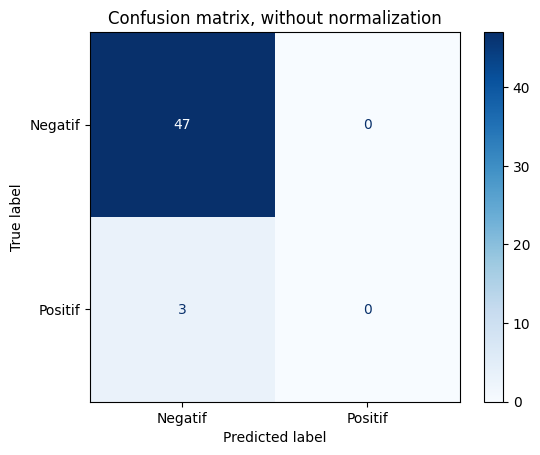

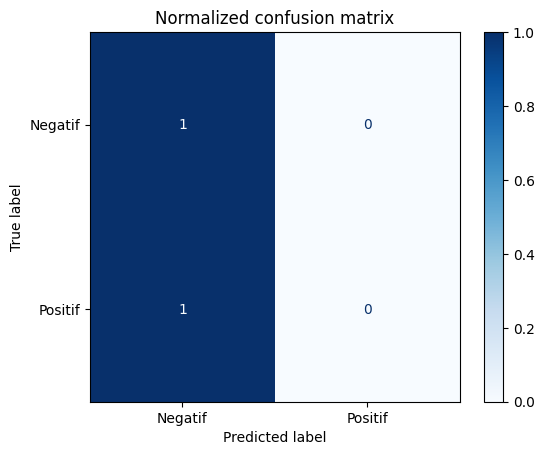

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming dataBersih is your dataset
X_train, X_test, y_train, y_test = train_test_split(dataBersih['text_clean'], dataBersih['label'], random_state=0)

# Fill NaN values with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Run classifier
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_nb,
        X_test,
        y_test,
        display_labels=None,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

